# 11.2 Exercises: Building a CNN Image Classifier
# Rahul Rajeev

In [57]:
# libraries
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras import backend as k
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

**1. Load Dataset**

In [28]:
# loading data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [29]:
x_train[0].shape

(28, 28)

**2. Display the first five images in the training data set (see section 8.1 in the Machine Learning with Python Cookbook). Compare these to the first five training labels**

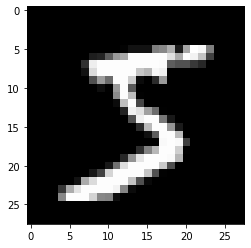

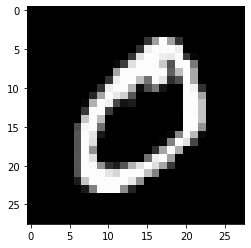

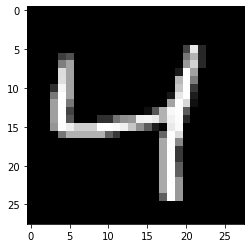

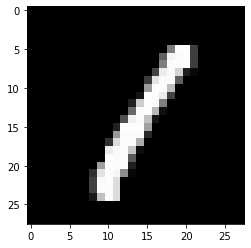

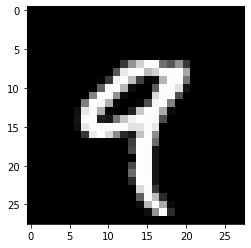

In [30]:
# looping for first 5 using imshow on the array for pixels
for i in range(5):
    plt.imshow(x_train[i], cmap='gray')
    plt.show()

**3. Build and train a Keras CNN classifier on the MNIST training set.**

In [31]:
# setting image information
k.set_image_data_format("channels_last")

channels = 1
height = 28
width = 28

x_train = x_train.reshape(x_train.shape[0], height, width, channels)
x_test = x_test.reshape(x_test.shape[0], height, width, channels)

In [32]:
x_train[0].shape

(28, 28, 1)

In [33]:
# rescale pixels
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [34]:
# one-hot
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [35]:
x_test.shape

(10000, 28, 28, 1)

In [36]:
y_test.shape

(10000, 10)

In [61]:
# followed with the book, made some changes regarding data format to make channels last as that the new keras doesn't allow
# channels first data on cpus. 

network = Sequential()
network.add(Conv2D(filters=64, kernel_size = (5,5), 
                   input_shape = (height, width, channels), activation = "relu"))
network.add(MaxPooling2D(pool_size = (2,2), data_format = "channels_last"))
network.add(Dropout(0.5))
network.add(Flatten())
network.add(Dense(128, activation = "relu"))
network.add(Dropout(0.5))
network.add(Dense(y_test.shape[1], activation = "softmax"))

network.compile(loss="categorical_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

network.fit(x_train, y_train, epochs=2, verbose = 0, batch_size = 1000)

**4. Report accuracy of model**

In [62]:
score = network.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1013 - accuracy: 0.9705


**5. Display a visualization**

In [63]:
predictions = network.predict(x_test)

# gets the index of the maximum value, which is the prediction/test number itself
Y_pred = np.argmax(predictions, 1)
Y_test = np.argmax(y_test, 1)

313/313 [==============================] - 1s 3ms/step


In [64]:
print('First results - Test:', Y_test[0], '| Predictions', Y_pred[0])

First results - Test: 7 | Predictions 7


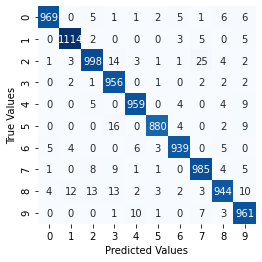

In [65]:
mat = confusion_matrix(Y_test, Y_pred)

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

**6. Summarize Results**

Following the book's model with some adjustments, I have an accuracy of about 97%. There were some errors regarding the version of keras in the book vs the version of keras that would allow this model to be ran on CPU. With the help of classmates, we figured out that in the current version, channels_last is preferrable, so I set the data to follow these dimensions as well as passed some additional parameters into the maxpooling2d layer. 